<a href="https://colab.research.google.com/github/Rifqi1006/First_Repo/blob/main/Sales_Performance_%26_Customer_Behavior.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sales Performance Analysis & Customer Behavior**

### **Problem Steatment**

Periode Natal selalu menjadi momen puncak yang menjanjikan lonjakan penjualan. Namun, tingginya volume transaksi sering kali menyulitkan perusahaan untuk melihat gambaran sebenarnya: tren penjualan yang dominan, produk yang paling diminati, dan kebiasaan belanja pelanggan yang berkontribusi terhadap pendapatan. Tanpa analisis yang tepat, strategi pemasaran bisa meleset dari target dan potensi musim penjualan tidak bisa dimanfaatkan secara maksimal.

### **Objective**

- Mengukur kinerja penjualan, tren, dan efektivitas
kanal penjualan (online vs offline).
- Memahami profil pelanggan melalui segmentasi demografi dan menganalisis preferensi produk, serta perilaku pembelian mereka.

### **Variabel Yang Tersedia**

Dari dataset yang dimiliki terdapat beberapa data yang tersedia:


---

**1. TransactionID:** adalah nomor unik yang diberikan untuk setiap transaksi.\
**2. Date:** Tanggal transaksi dalam format YYYY-MM-DD.\
**3. Time:** Waktu transaksi dalam format HH:MM:SS.\
**4. CustomerID:** ID unik untuk setiap pelanggan.\
**5. Age:** Usia pelanggan.\
**6. Gender:** Jenis kelamin pelanggan: Male, Female, atau Other.\
**7. Location:** Kota atau daerah tempat transaksi dilakukan.\
**8. StoreID:** ID unik toko fisik (jika pembelian dilakukan secara offline).\
**9. OnlineOrderFlag:** Menunjukkan apakah transaksi dilakukan secara online (True) atau offline (False).\
**10. ProductID:** ID unik dari produk yang dibeli.\
**11. ProductName:** Nama produk yang dibeli.\
**12. Category:** Kategori produk, misalnya: Electronics, Clothing, Toys, Food, Decorations.\
**13. Quantity:** Jumlah unit produk yang dibeli dalam transaksi tersebut.\
**14. UnitPrice:** Harga per unit dari produk yang dibeli.\
**15. TotalPrice:** Total harga produk dalam satu transaksi, dihitung sebagai Quantity × UnitPrice.\
**16. PaymentType:** Jenis metode pembayaran yang digunakan: Credit Card, Debit Card, Cash, atau Online Payment.\
**17. PromotionApplied:** Menunjukkan apakah ada promosi yang diterapkan dalam transaksi tersebut (True atau False).\
**18. DiscountAmount:** Jumlah nominal potongan harga yang diberikan (jika ada).\
**19. GiftWrap:** Menunjukkan apakah produk dibungkus sebagai hadiah (True atau False).\
**20. ShippingMethod:** Metode pengiriman yang digunakan untuk pembelian online, seperti Standard, Express, atau Overnight.\
**21. DeliveryTime:** Lama waktu pengiriman (dalam hari) untuk transaksi online.\
**22. Weather:** Kondisi cuaca saat transaksi berlangsung, seperti Sunny, Rainy, atau Snowy.\
**23. Event:** Acara khusus atau hari besar yang terjadi pada hari transaksi, misalnya Black Friday atau Christmas Market.\
**24. CustomerSatisfaction:** Tingkat kepuasan pelanggan terhadap transaksi, dinilai dari skala 1 hingga 5.\
**25. ReturnFlag:** Menunjukkan apakah produk dikembalikan (True) atau tidak (False).

### **Import Package**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as stats

### **Import Data**

In [2]:
df = pd.read_csv('Christmas_Sales.csv', header=0)

In [3]:
pd.set_option('display.max_column',None)

### **Data Understanding**

In [4]:
# DataFrame
df.head()

,TransactionID,Date,Time,CustomerID,Age,Gender,Location,StoreID,OnlineOrderFlag,ProductID,ProductName,Category,Quantity,UnitPrice,TotalPrice,PaymentType,PromotionApplied,DiscountAmount,GiftWrap,ShippingMethod,DeliveryTime,Weather,Event,CustomerSatisfaction,ReturnFlag
0,1,12/24/2020,7:27:59,441,27,Other,City_15,NaN,True,106,Toys_Product,Toys,5,96.786255,483.931273,Credit Card,False,0.0,False,Standard,5.0,Snowy,NaN,5,False
1,2,11/18/2022,14:36:39,340,43,Male,City_13,NaN,True,816,Clothing_Product,Clothing,1,95.279579,95.279579,Credit Card,True,0.0,True,Express,3.0,Sunny,NaN,2,True
2,3,12/26/2019,20:23:50,31,25,Other,City_7,92.0,False,508,Clothing_Product,Clothing,2,52.371645,104.743291,Credit Card,False,0.0,False,NaN,NaN,Rainy,Christmas Market,4,False
3,4,11/13/2018,23:08:08,39,64,Male,City_20,100.0,False,710,Toys_Product,Toys,5,63.647293,318.236463,Debit Card,False,0.0,True,NaN,NaN,Rainy,NaN,1,True
4,5,12/13/2020,4:38:08,344,26,Other,City_10,90.0,False,687,Toys_Product,Toys,3,57.384041,172.152122,Cash,False,0.0,True,NaN,NaN,Sunny,Christmas Market,4,False


In [5]:
# Info Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionID         10000 non-null  int64  
 1   Date                  10000 non-null  object 
 2   Time                  10000 non-null  object 
 3   CustomerID            10000 non-null  int64  
 4   Age                   10000 non-null  int64  
 5   Gender                10000 non-null  object 
 6   Location              10000 non-null  object 
 7   StoreID               4582 non-null   float64
 8   OnlineOrderFlag       10000 non-null  bool   
 9   ProductID             10000 non-null  int64  
 10  ProductName           10000 non-null  object 
 11  Category              10000 non-null  object 
 12  Quantity              10000 non-null  int64  
 13  UnitPrice             10000 non-null  float64
 14  TotalPrice            10000 non-null  float64
 15  PaymentType         

In [6]:
# Statistika Deskriptif
df.describe().round(2)

,TransactionID,CustomerID,Age,StoreID,ProductID,Quantity,UnitPrice,TotalPrice,DiscountAmount,DeliveryTime,CustomerSatisfaction
count,10000.00,10000.00,10000.00,4582.00,10000.00,10000.00,10000.00,10000.00,10000.00,5418.00,10000.00
mean,5000.50,251.93,43.79,50.92,500.23,3.01,54.96,165.43,6.95,3.00,2.98
std,2886.90,145.00,15.37,28.86,288.74,1.40,26.24,116.11,11.08,1.42,1.42
min,1.00,1.00,18.00,1.00,1.00,1.00,10.00,10.02,0.00,1.00,1.00
25%,2500.75,127.00,30.00,26.00,252.00,2.00,32.05,71.90,0.00,2.00,2.00
50%,5000.50,254.00,44.00,51.00,500.00,3.00,55.04,136.29,0.00,3.00,3.00
75%,7500.25,379.00,57.00,76.00,750.00,4.00,77.85,241.05,10.41,4.00,4.00
max,10000.00,500.00,70.00,100.00,1000.00,5.00,100.00,499.98,49.95,5.00,5.00


In [7]:
# Hubungan data dengan missing value
print(df[['CustomerID','OnlineOrderFlag','StoreID','ShippingMethod','DeliveryTime']])

      CustomerID  OnlineOrderFlag  StoreID ShippingMethod  DeliveryTime
0            441             True      NaN       Standard           5.0
1            340             True      NaN        Express           3.0
2             31            False     92.0            NaN           NaN
3             39            False    100.0            NaN           NaN
4            344            False     90.0            NaN           NaN
...          ...              ...      ...            ...           ...
9995         245             True      NaN        Express           4.0
9996         295             True      NaN        Express           5.0
9997         202            False     22.0            NaN           NaN
9998         310             True      NaN        Express           1.0
9999         469             True      NaN      Overnight           2.0

[10000 rows x 5 columns]


Missing value pada kolom StoreID, ShippingMethod, dan DeliveryTime merupakan konsekuensi logis dari jenis transaksi yang terjadi.
* Transaksi online (OnlineOrderFlag = TRUE) secara alami tidak memiliki StoreID karena tidak ada toko fisik yang terlibat.
* Sebaliknya, transaksi yang dilakukan langsung di toko (OnlineOrderFlag = FALSE) tidak memerlukan ShippingMethod dan DeliveryTime karena pelanggan langsung membawa pulang produk yang dibeli.

### **Data Preparation**

In [8]:
# Cek Data Duplicate
df.duplicated().sum()

np.int64(0)

In [9]:
# Cek Missing Value
print(df.isnull().sum())

TransactionID              0
Date                       0
Time                       0
CustomerID                 0
Age                        0
Gender                     0
Location                   0
StoreID                 5418
OnlineOrderFlag            0
ProductID                  0
ProductName                0
Category                   0
Quantity                   0
UnitPrice                  0
TotalPrice                 0
PaymentType                0
PromotionApplied           0
DiscountAmount             0
GiftWrap                   0
ShippingMethod          4582
DeliveryTime            4582
Weather                    0
Event                   2838
CustomerSatisfaction       0
ReturnFlag                 0
dtype: int64


In [10]:
# Salin dataframe untuk pembersihan data
df_clean = df.copy()

# Mengganti missing value dengan nilai tertentu
df_clean.fillna({
    'ShippingMethod': 'No Shipping',
    'DeliveryTime': 0,
    'StoreID': 'Online',
    'Event': 'No Event'
}, inplace=True)

# Mengubah tipe data
df_clean = df_clean.astype({
    'TransactionID': str,
    'CustomerID': str,
    'StoreID': str,
    'ProductID': str
})

# Mengubah kolom Date ke format datetime
df_clean['Date'] = pd.to_datetime(df_clean['Date'])

# Menambahkan kolom Year dan Month
df_clean['Year'] = df_clean['Date'].dt.year
df_clean['Month'] = df_clean['Date'].dt.month

# Menghapus kolom redundant (ProductName)
df_clean.drop(columns=['ProductName'], inplace=True)

In [11]:
# Cek transaksi online yang tidak memiliki ShippingMethod
inconsistent_online = df_clean[(df_clean['OnlineOrderFlag'] == True) &
                              (df_clean['ShippingMethod'] == 'No Shipping')]

print(f"Jumlah transaksi online tanpa ShippingMethod: {len(inconsistent_online)}")

Jumlah transaksi online tanpa ShippingMethod: 0


In [12]:
# Cek Konsistensi TotalPrice dengan Quantity dan UnitPrice
CalculatedTotal = df_clean['Quantity'] * df_clean['UnitPrice']
inconsistent_prices = df_clean[abs(df_clean['TotalPrice'] - CalculatedTotal) != 0]

print(f"Jumlah transaksi dengan perhitungan harga tidak konsisten: {len(inconsistent_prices)}")

Jumlah transaksi dengan perhitungan harga tidak konsisten: 6091


In [13]:
# Mengganti seluruh nilai pada TotalPrice dengan CalculatedTotal
df_clean['TotalPrice'] = CalculatedTotal

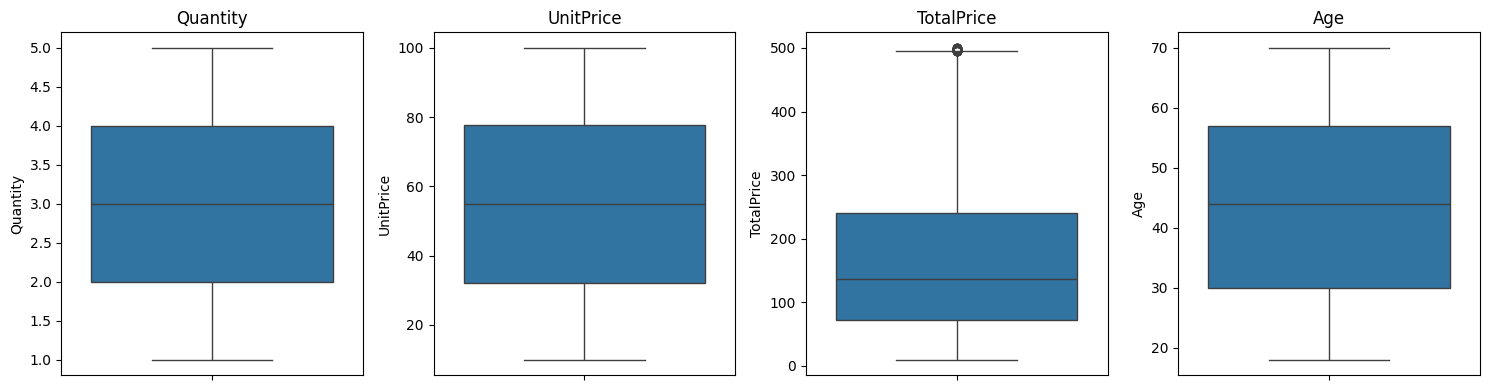

In [14]:
# Cek outlier untuk kolom numerik
numeric_cols = ['Quantity', 'UnitPrice', 'TotalPrice', 'Age']

plt.figure(figsize=(15,4))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, len(numeric_cols), i)
    sns.boxplot(y=df_clean[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [15]:
print(df_clean.isnull().sum())

TransactionID           0
Date                    0
Time                    0
CustomerID              0
Age                     0
Gender                  0
Location                0
StoreID                 0
OnlineOrderFlag         0
ProductID               0
Category                0
Quantity                0
UnitPrice               0
TotalPrice              0
PaymentType             0
PromotionApplied        0
DiscountAmount          0
GiftWrap                0
ShippingMethod          0
DeliveryTime            0
Weather                 0
Event                   0
CustomerSatisfaction    0
ReturnFlag              0
Year                    0
Month                   0
dtype: int64


In [16]:
df_clean.head()

,TransactionID,Date,Time,CustomerID,Age,Gender,Location,StoreID,OnlineOrderFlag,ProductID,Category,Quantity,UnitPrice,TotalPrice,PaymentType,PromotionApplied,DiscountAmount,GiftWrap,ShippingMethod,DeliveryTime,Weather,Event,CustomerSatisfaction,ReturnFlag,Year,Month
0,1,2020-12-24,7:27:59,441,27,Other,City_15,Online,True,106,Toys,5,96.786255,483.931273,Credit Card,False,0.0,False,Standard,5.0,Snowy,No Event,5,False,2020,12
1,2,2022-11-18,14:36:39,340,43,Male,City_13,Online,True,816,Clothing,1,95.279579,95.279579,Credit Card,True,0.0,True,Express,3.0,Sunny,No Event,2,True,2022,11
2,3,2019-12-26,20:23:50,31,25,Other,City_7,92.0,False,508,Clothing,2,52.371645,104.743291,Credit Card,False,0.0,False,No Shipping,0.0,Rainy,Christmas Market,4,False,2019,12
3,4,2018-11-13,23:08:08,39,64,Male,City_20,100.0,False,710,Toys,5,63.647293,318.236463,Debit Card,False,0.0,True,No Shipping,0.0,Rainy,No Event,1,True,2018,11
4,5,2020-12-13,4:38:08,344,26,Other,City_10,90.0,False,687,Toys,3,57.384041,172.152122,Cash,False,0.0,True,No Shipping,0.0,Sunny,Christmas Market,4,False,2020,12


In [17]:
df_clean.describe().round(2)

,Date,Age,Quantity,UnitPrice,TotalPrice,DiscountAmount,DeliveryTime,CustomerSatisfaction,Year,Month
count,10000,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.0
mean,2021-05-31 23:03:41.760000256,43.79,3.01,54.96,165.43,6.95,1.63,2.98,2020.50,11.5
min,2018-11-01 00:00:00,18.00,1.00,10.00,10.02,0.00,0.00,1.00,2018.00,11.0
25%,2019-12-02 00:00:00,30.00,2.00,32.05,71.90,0.00,0.00,2.00,2019.00,11.0
50%,2021-11-01 00:00:00,44.00,3.00,55.04,136.29,0.00,1.00,3.00,2021.00,12.0
75%,2022-11-30 00:00:00,57.00,4.00,77.85,241.05,10.41,3.00,4.00,2022.00,12.0
max,2023-12-31 00:00:00,70.00,5.00,100.00,499.98,49.95,5.00,5.00,2023.00,12.0
std,NaN,15.37,1.40,26.24,116.11,11.08,1.83,1.42,1.71,0.5


In [18]:
# Menyimpan dataframe yang sudah dibersihkan
df_clean.to_csv('data_clean.csv', index=False)

### **Sales Performance Analysis**

In [19]:
# Membuat dataframe penjualan yang hanya berisi transaksi tanpa pengembalian
df_sales = df_clean[df_clean['ReturnFlag'] == False]

##### **Tren Penjualan Bulanan dan Tahunan**

In [20]:
# Total penjualan berdasarkan tahun dan bulan
sales_by_month = df_sales.groupby(['Year','Month'])['TotalPrice'].sum().unstack()
sales_by_month = sales_by_month.rename(columns={11:'November(USD)', 12:'Desember(USD)'})
sales_by_month['TOTAL(USD)'] = sales_by_month.sum(axis=1)
sales_by_month_style = sales_by_month.style.format('{:,.0f}')

sales_by_month_style

Month,November(USD),Desember(USD),TOTAL(USD)
Year,,,
2018,"71,457","68,911","140,368"
2019,"61,658","67,082","128,739"
2020,"67,919","71,852","139,771"
2021,"63,236","73,386","136,622"
2022,"70,832","62,677","133,509"
2023,"66,909","69,778","136,687"


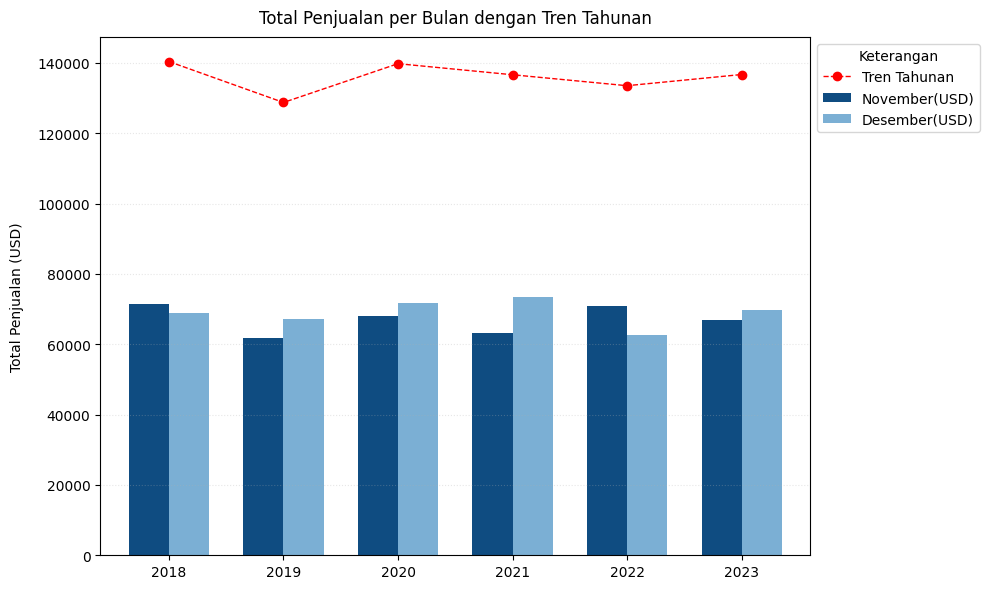

In [21]:
# Multiple bar chart (November vs Desember)
ax = sales_by_month[['November(USD)','Desember(USD)']].\
                        plot(kind='bar',
                        figsize=(10, 6),
                        color=['#0F4C81', '#7BAFD4'],
                        width=0.7)

plt.title('Total Penjualan per Bulan dengan Tren Tahunan', pad=10)
plt.ylabel('Total Penjualan (USD)', labelpad=10)
plt.xlabel('')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle=':', alpha=0.3)

# Plot garis tren tahunan
sales_total = sales_by_month[['November(USD)','Desember(USD)']].sum(axis=1)
ax.plot(ax.get_xticks(),
        sales_total,
        color='red',
        linestyle='--',
        marker='o',
        linewidth=1,
        label='Tren Tahunan')

# Memindahkan legend ke luar chart
plt.legend(title='Keterangan',
           bbox_to_anchor=(1, 1),
           loc='upper left')

plt.tight_layout()
plt.show()

- Total penjualan tahunan berada di kisaran USD 128.000 - USD 141.000.
- Puncak penjualan tahunan terjadi di tahun 2018 dan 2020, sementara tahun-tahun lain relatif stabil di bawahnya.
- Desember konsisten mencatat penjualan sedikit lebih tinggi dibanding November pada hampir semua tahun.

##### **Total Penjualan per Kategori Produk**

In [22]:
# Total penjualan berdasarkan kategori produk
sales_by_category = df_sales.groupby('Category')['TotalPrice'].sum().sort_values(ascending=False)
sales_by_category = sales_by_category.to_frame('Total Penjualan(USD)')
sales_by_category['Persentase'] = (sales_by_category['Total Penjualan(USD)']\
                                  /sales_by_category['Total Penjualan(USD)'].sum() * 100).round(1)

sales_by_category_style = sales_by_category.style.format({
    'Total Penjualan(USD)':'{:,.0f}',
    'Persentase':'{:.1f}%'})

sales_by_category_style

,Total Penjualan(USD),Persentase
Category,,
Toys,"165,599",20.3%
Food,"165,073",20.2%
Clothing,"163,959",20.1%
Electronics,"162,039",19.9%
Decorations,"159,026",19.5%


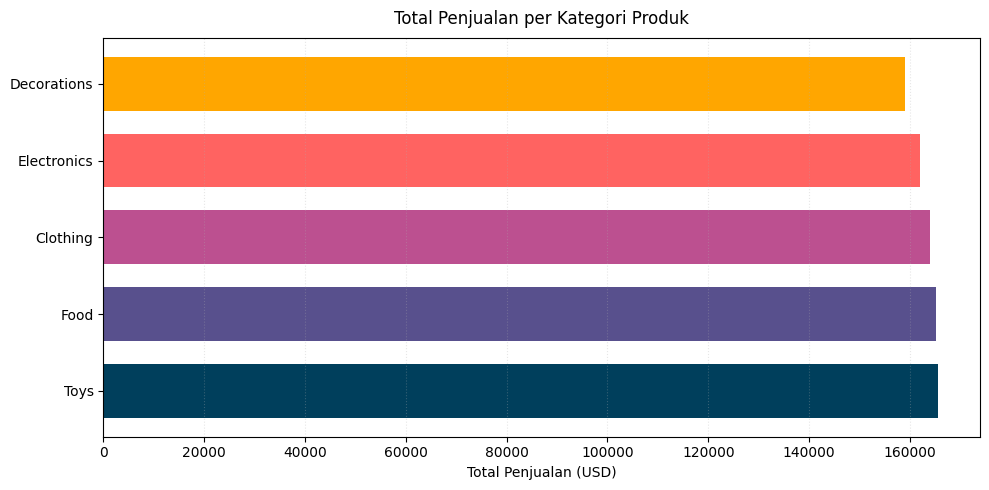

In [23]:
# Horizontal bar chart
ax = sales_by_category['Total Penjualan(USD)'].plot(
    kind='barh',
    figsize=(10, 5),
    color=['#003f5c','#58508d','#bc5090','#ff6361','#ffa600'],
    width=0.7)

plt.title('Total Penjualan per Kategori Produk', pad=10)
plt.xlabel('Total Penjualan (USD)')
plt.ylabel('')
plt.grid(axis='x', linestyle=':', alpha=0.3)
plt.tight_layout()
plt.show()

- Penjualan setiap kategori produk relatif seimbang, dengan nilai total berada di kisaran USD 159.000–166.000.
- Toys mencatat total penjualan tertinggi, yakni USD 165.599.

##### **Perbandingan Kanal Penjualan: Online vs Offline**

In [24]:
# Total penjualan berdasarkan tahun dan channel
sales_by_channel = df_sales.groupby(['Year','OnlineOrderFlag'])['TotalPrice'].sum().unstack()
sales_by_channel = sales_by_channel.rename(columns={True:'Online(USD)',False:'Offline(USD)'})
sales_by_channel_style = sales_by_channel.style.format('{:,.0f}')

sales_by_channel_style

OnlineOrderFlag,Offline(USD),Online(USD)
Year,,
2018,"100,812","39,556"
2019,"79,504","49,236"
2020,"61,596","78,175"
2021,"61,060","75,562"
2022,"42,452","91,057"
2023,"26,769","109,918"


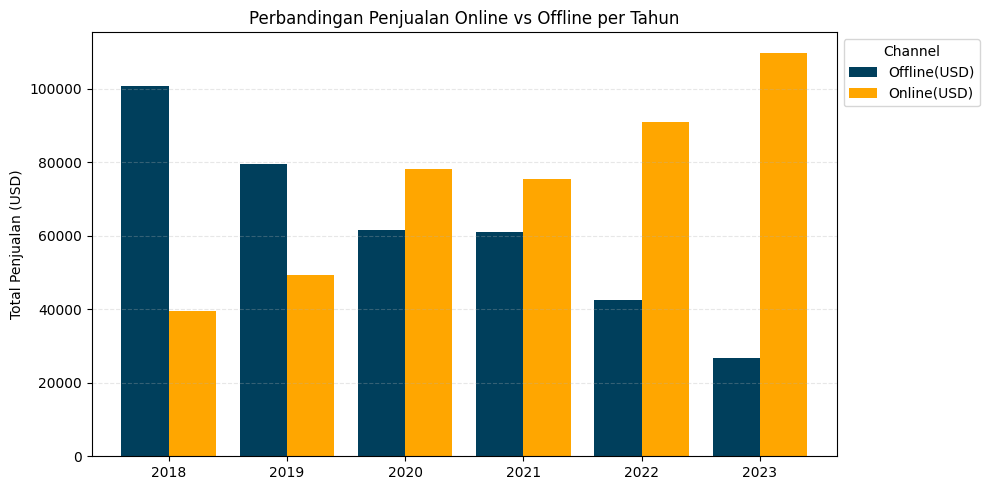

In [25]:
# Multiple bar chart
ax = sales_by_channel.plot(kind='bar',
                        color = ['#003f5c','#ffa600'],
                        figsize=(10,5),
                        width=0.8)

plt.title('Perbandingan Penjualan Online vs Offline per Tahun')
plt.ylabel('Total Penjualan (USD)')
plt.xlabel('')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Memindahkan legend ke luar chart
plt.legend(title='Channel',
          bbox_to_anchor=(1, 1),
          loc='upper left')

plt.tight_layout()
plt.show()

- Pergeseran dominasi dari offline ke online — sejak 2020, penjualan online melampaui offline dan terus meningkat siginifikan (dari USD 39.556 di tahun 2018 menjadi USD 109.918 di tahun 2023).
- Penurunan tajam kanal offline diasumsikan karena pembatasan aktivitas fisik saat pandemi COVID-19 dan kebiasaan belanja yang bertahan pascapandemi.

##### **Evolusi Penjualan Online vs Offline per Kategori Produk**

In [26]:
# Pivot table penjualan produk berdasarkan kategori, tahun, dan channel
pivot_channel = pd.pivot_table(df_sales,
                            values='TotalPrice',
                            index=['Year','Category'],
                            columns='OnlineOrderFlag',
                            aggfunc='sum').rename(columns={True: 'Online', False: 'Offline'}).reset_index()

pivot_channel.head()

OnlineOrderFlag,Year,Category,Offline,Online
0,2018,Clothing,19951.662224,7518.620013
1,2018,Decorations,20437.637316,5632.206102
2,2018,Electronics,19521.691789,7980.421496
3,2018,Food,21699.101566,8127.437990
4,2018,Toys,19202.376424,10296.838308


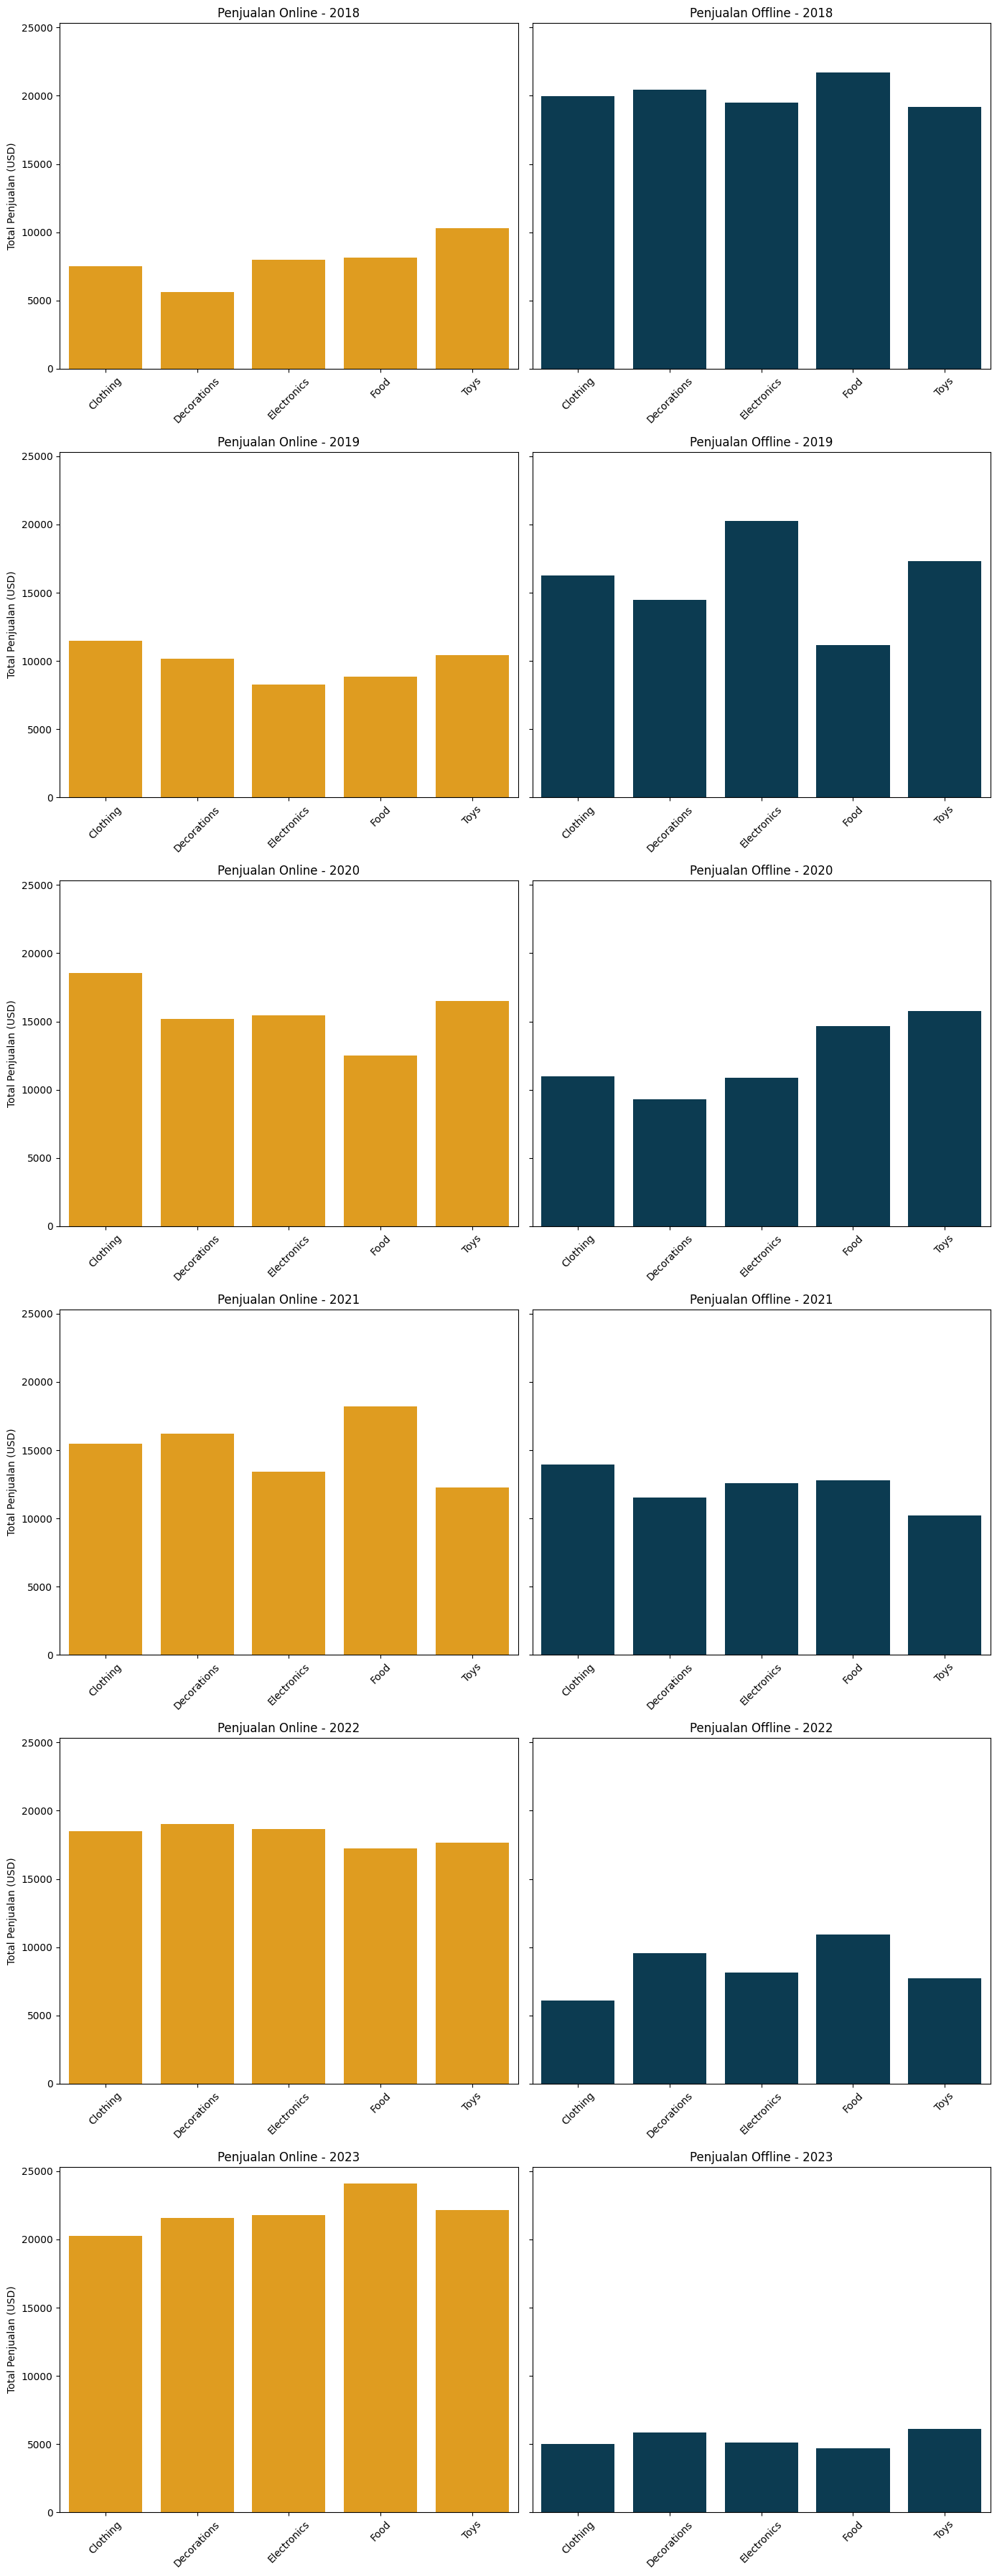

In [27]:
# Plot dengan sumbu Y seragam
years = pivot_channel['Year'].unique()
n_years = len(years)

# Grid subplot
fig, axes = plt.subplots(n_years, 2, figsize=(14, 6 * n_years), sharey=True)

for i, year in enumerate(years):
    year_data = pivot_channel[pivot_channel['Year'] == year]

    # Plot online
    sns.barplot(data=year_data, x='Category', y='Online', color='#ffa600', ax=axes[i, 0])
    axes[i, 0].set_title(f'Penjualan Online - {year}')
    axes[i, 0].set_xlabel("")
    axes[i, 0].set_ylabel('Total Penjualan (USD)')
    axes[i, 0].tick_params(axis='x', rotation=45)

    # Plot offline
    sns.barplot(data=year_data, x='Category', y='Offline', color='#003f5c', ax=axes[i, 1])
    axes[i, 1].set_title(f'Penjualan Offline - {year}')
    axes[i, 1].set_xlabel("")
    axes[i, 1].set_ylabel('Total Penjualan (USD)')
    axes[i, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

- Seluruh kategori produk mengalami lonjakan di kanal online mulai tahun 2020, sejalan dengan perubahan perilaku belanja saat pandemi COVID-19.
- Di tahun 2023, penjualan online unggul signifikan di semua kategori produk.

##### **Pola Penjualan Produk Berdasarkan Perubahan Musim**

In [28]:
# Penjualan produk berdasarkan perubahan musim
sales_by_seasonal = df_sales.groupby(['Weather','Category'])['TotalPrice'].sum().unstack().\
                    rename(columns={
                        'Clothing':'Clothing(USD)',
                        'Decorations':'Decorations(USD)',
                        'Electronics':'Electronics(USD)',
                        'Food':'Food(USD)',
                        'Toys':'Toys(USD)'})

sales_by_seasonal_style = sales_by_seasonal.style.format('{:,.0f}')
sales_by_seasonal_style

Category,Clothing(USD),Decorations(USD),Electronics(USD),Food(USD),Toys(USD)
Weather,,,,,
Rainy,"61,764","47,028","56,695","54,382","57,080"
Snowy,"54,980","59,410","52,656","55,334","53,726"
Sunny,"47,215","52,588","52,688","55,358","54,794"


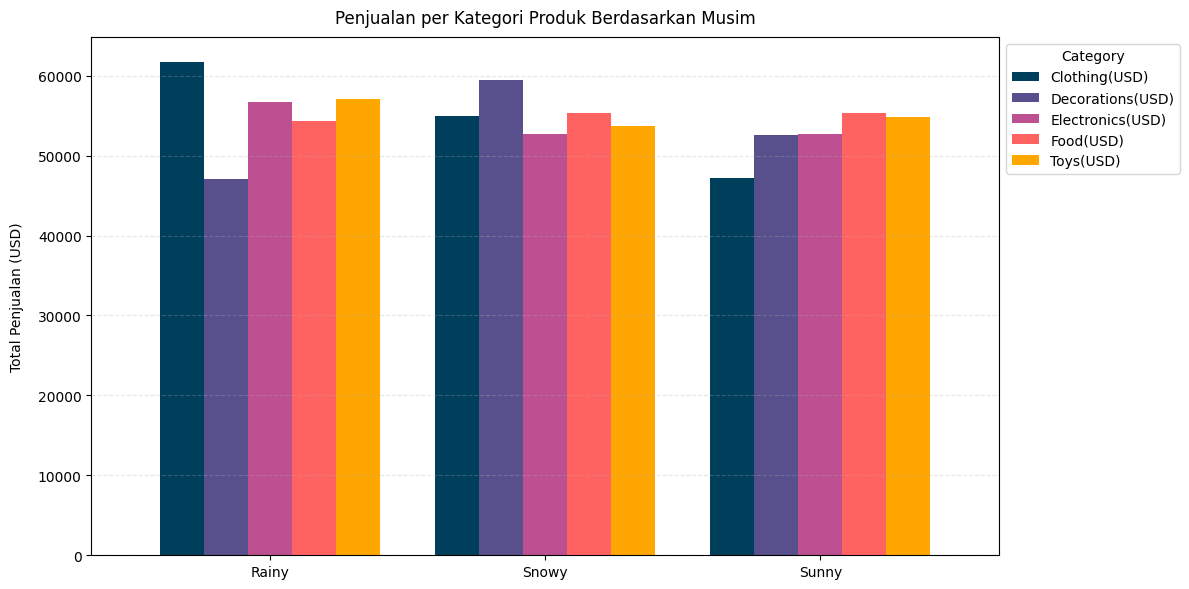

In [29]:
# Multiple bar chart
sales_by_seasonal.plot(kind='bar',
                   figsize=(12, 6),
                   color=['#003f5c','#58508d','#bc5090','#ff6361','#ffa600'],
                   width=0.8)

plt.title('Penjualan per Kategori Produk Berdasarkan Musim', pad=10)
plt.ylabel('Total Penjualan (USD)', labelpad=10)
plt.xlabel('')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.xticks(rotation=0)

# Memindahkan legend ke luar chart
plt.legend(title='Category',
          bbox_to_anchor=(1, 1),
          loc='upper left')

plt.tight_layout()
plt.show()

- Rainy: penjualan tertinggi pada Clothing (61.764 USD) — peluang stok dan promosi produk fashion musim hujan.
- Snowy: penjualan tertinggi pada Decorations (59.410 USD) — relevan dengan momen liburan dan perayaan akhir tahun.
- Sunny: penjualan tertinggi pada Food (55.358 USD) — konsumsi meningkat saat cuaca cerah.
- Rata-rata penjualan tiap kategori tidak jauh berbeda, artinya semua kategori tetap punya kontribusi signifikan.

##### **Kontribusi Penjualan Berdasarkan Kategori Produk dan Wilayah**

In [30]:
# Pivot tabel penjualan produk berdasarkan kategori dan lokasi
heatmap_data = df_sales.pivot_table(
    index='Category',
    columns='Location',
    values='TotalPrice',
    aggfunc='sum',
    fill_value=0
)

heatmap_data_style = heatmap_data.style.format('{:,.0f}')
heatmap_data_style

Location,City_1,City_10,City_11,City_12,City_13,City_14,City_15,City_16,City_17,City_18,City_19,City_2,City_20,City_3,City_4,City_5,City_6,City_7,City_8,City_9
Category,,,,,,,,,,,,,,,,,,,,
Clothing,"8,239","7,622","8,818","9,526","9,622","7,169","9,337","8,433","5,586","9,100","7,955","6,781","7,826","9,408","9,145","7,987","5,649","9,256","6,755","9,744"
Decorations,"7,708","7,126","8,186","6,373","7,285","10,899","7,212","7,519","7,803","9,580","7,931","8,776","7,921","6,613","7,376","8,118","7,142","8,269","9,403","7,784"
Electronics,"9,188","7,832","7,660","6,651","6,021","8,301","8,232","8,051","8,845","10,329","9,915","7,557","8,423","7,837","8,277","8,203","9,402","7,778","7,500","6,035"
Food,"10,790","6,472","7,868","9,336","7,374","8,819","10,103","7,770","6,688","8,297","8,914","7,831","10,658","6,573","8,787","8,595","7,719","7,031","8,993","6,455"
Toys,"8,439","6,487","7,854","8,273","11,937","7,585","8,229","8,052","6,614","9,520","8,239","8,759","6,933","9,668","9,651","7,897","7,347","8,279","5,832","10,003"


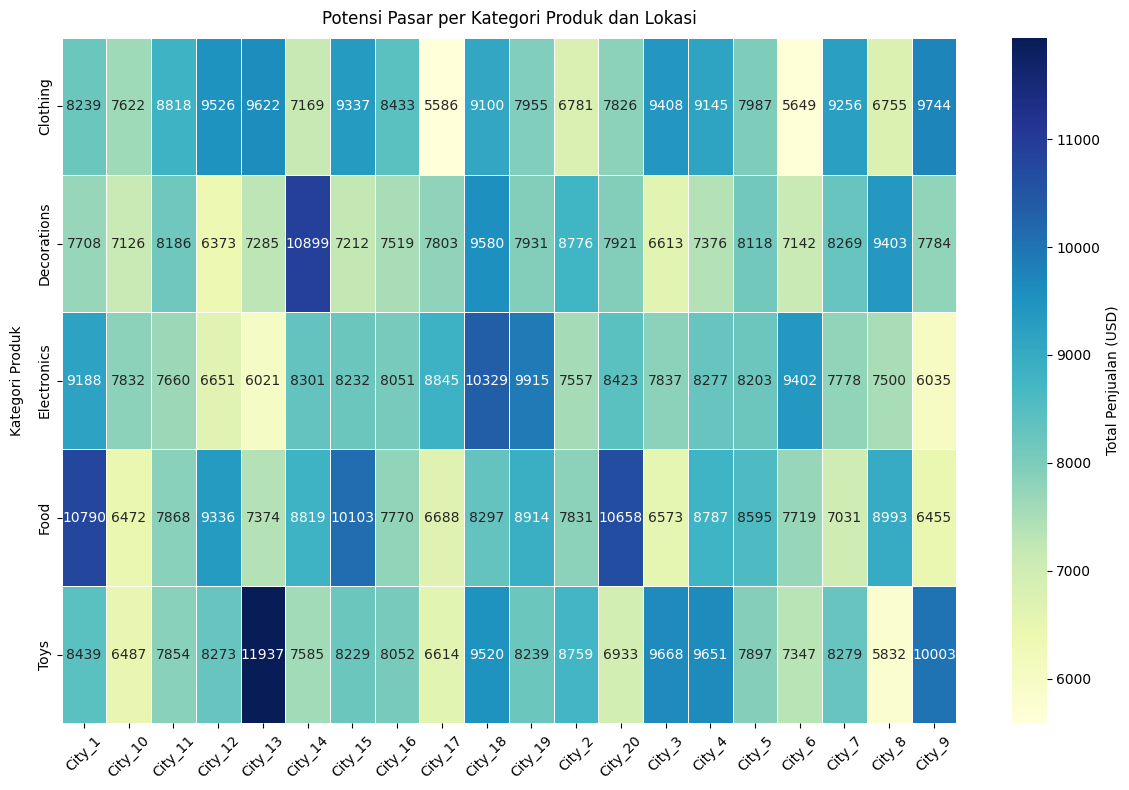

In [31]:
# HeatMap
plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".0f",
    cmap="YlGnBu",
    linewidths=.5,
    cbar_kws={'label':'Total Penjualan (USD)'}
)

plt.title('Potensi Pasar per Kategori Produk dan Lokasi', pad=10)
plt.ylabel('Kategori Produk', labelpad=10)
plt.xlabel('')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- City-18 merupakan pasar strategis multi-kategori dengan penjualan setiap kategori > USD 8.000 dan total penjualan USD 46.826.
- Sebaliknya, City-17 jadi pasar paling lesu dengan total penjualan USD 35.537.
- Setiap kategori produk memiliki kota unggulannya masing-masing, seperti Electronics (City-18), Toys (City-13), Food (City-1 dan City-20), Clothing (City-9, City-12, dan City-13), serta Decorations (City-14).

### **Customer Behavior**

##### **Segmentasi Pelanggan (Berdasarkan Usia, Gender, Lokasi)**

In [32]:
# Membuat dataframe customer
df_customer = df_sales.copy()

In [33]:
# Segmentasi usia
bins = [0, 12, 19, 35, 55, 100]
labels = ['Anak-anak(< 12)', 'Remaja(13-19)', 'Dewasa Muda(20-35)',
          'Paruh Baya(36-55)', 'Lansia(> 56)']
df_customer['AgeSegment'] = pd.cut(df_sales['Age'], bins=bins, labels=labels, right=False)

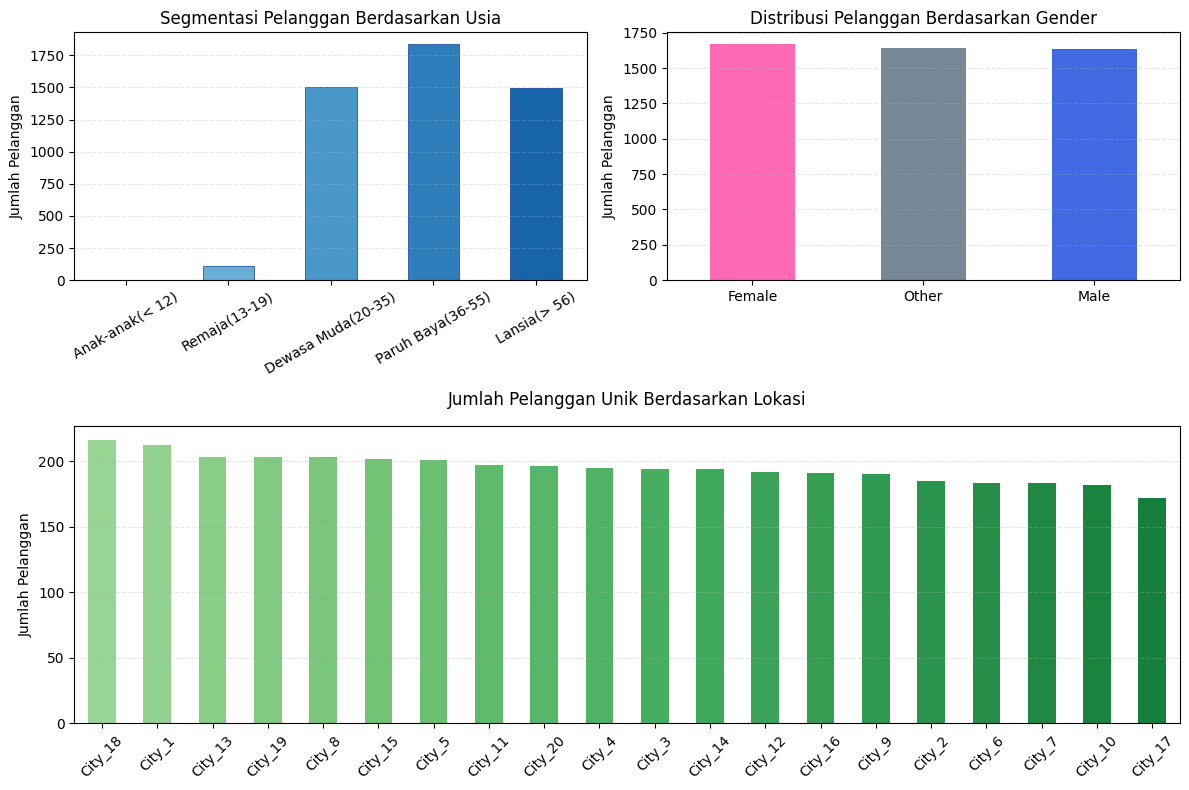

In [34]:
# Figure dan grid layout
fig = plt.figure(figsize=(12, 8))
grid = fig.add_gridspec(2, 2, height_ratios=[1, 1.2])

# Grafik 1: Segmentasi usia
ax1 = fig.add_subplot(grid[0, 0])
age_counts = df_customer['AgeSegment'].value_counts().sort_index()
ax1_colors = plt.cm.Blues(np.linspace(0.4, 0.8, len(age_counts)))
age_counts.plot(kind='bar', ax=ax1, color=ax1_colors, edgecolor='#0b3d91', linewidth=0.5)
ax1.set_title('Segmentasi Pelanggan Berdasarkan Usia')
ax1.set_ylabel('Jumlah Pelanggan')
ax1.set_xlabel('')
ax1.grid(axis='y', linestyle='--', alpha=0.3)
ax1.tick_params(axis='x', rotation=30)

# Grafik 2: Distribusi gender
ax2 = fig.add_subplot(grid[0, 1])
df_customer['Gender'].value_counts().plot(kind='bar', ax=ax2, color=['#FF69B4','#778899','#4169E1',])
ax2.set_title('Distribusi Pelanggan Berdasarkan Gender')
ax2.set_ylabel('Jumlah Pelanggan')
ax2.set_xlabel('')
ax2.grid(axis='y', linestyle='--', alpha=0.3)
ax2.tick_params(axis='x', rotation=0)

# Grafik 3: Distribusi lokasi
ax3 = fig.add_subplot(grid[1, :])

# Menghitung customer unik per lokasi
unique_customer = (
    df_customer.groupby('Location')['CustomerID']
    .nunique()
    .sort_values(ascending=False))

ax3_colors = plt.cm.Greens(np.linspace(0.4, 0.8, len(unique_customer)))
unique_customer.plot(kind='bar', ax=ax3, color=ax3_colors)
ax3.set_title('Jumlah Pelanggan Unik Berdasarkan Lokasi', pad=15)
ax3.set_ylabel('Jumlah Pelanggan')
ax3.set_xlabel('')
ax3.tick_params(axis='x', rotation=45)
ax3.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

- Pelanggan terbesar berasal dari kelompok Paruh Baya (36–55), diikuti Dewasa Muda (20–35) dan Lansia (>56), dengan jumlah masing-masing > 1500 pembelian.
- Segmen Anak-anak (<12) dan Remaja (13–19) sangat kecil kontribusinya (< 250 pembelian).
- Pembeli laki-laki, perempuan, dan lainnya memiliki jumlah yang relatif seimbang.
- City-18 dan City-1 menjadi lokasi dengan jumlah pelanggan terbanyak (>  200 pelanggan).
- Dominasi kelompok usia 36 tahun ke atas kemungkinan terkait perubahan perilaku belanja online selama pandemi, yang mendorong kelompok usia produktif dan lansia lebih aktif berbelanja digital.

##### **Preferensi Produk Berdasarkan Kategori Usia**

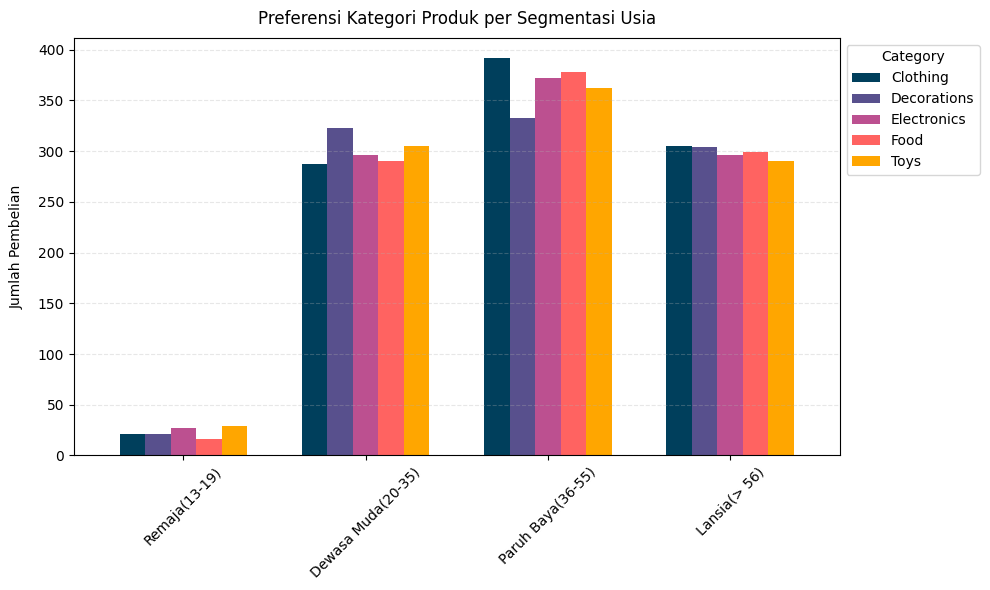

In [35]:
# Preferensi produk berdasarkan kategori usia
age_category = pd.crosstab(df_customer['AgeSegment'], df_customer['Category'])

age_category.plot(kind='bar', figsize=(10,6), width=0.7, color=['#003f5c','#58508d','#bc5090','#ff6361','#ffa600'])
plt.title('Preferensi Kategori Produk per Segmentasi Usia', pad=10)
plt.ylabel('Jumlah Pembelian', labelpad=10)
plt.xlabel('')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.xticks(rotation=45)
plt.legend(title='Category', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [36]:
age_category

Category,Clothing,Decorations,Electronics,Food,Toys
AgeSegment,,,,,
Remaja(13-19),21,21,27,16,29
Dewasa Muda(20-35),287,323,296,290,305
Paruh Baya(36-55),392,333,372,378,362
Lansia(> 56),305,304,296,299,290


- Paruh Baya (36–55) adalah segmen dengan pembelian tertinggi di hampir semua kategori produk.
- Dewasa Muda (20–35) juga menjadi segmen potensial, terutama untuk kategori Decorations dan Electronics.
- Remaja (13–19) menjadi segmen dengan jumlah pembelian sangat rendah di semua kategori.

##### **Rata-Rata Pembelian Berdasarkan Kategori Usia**

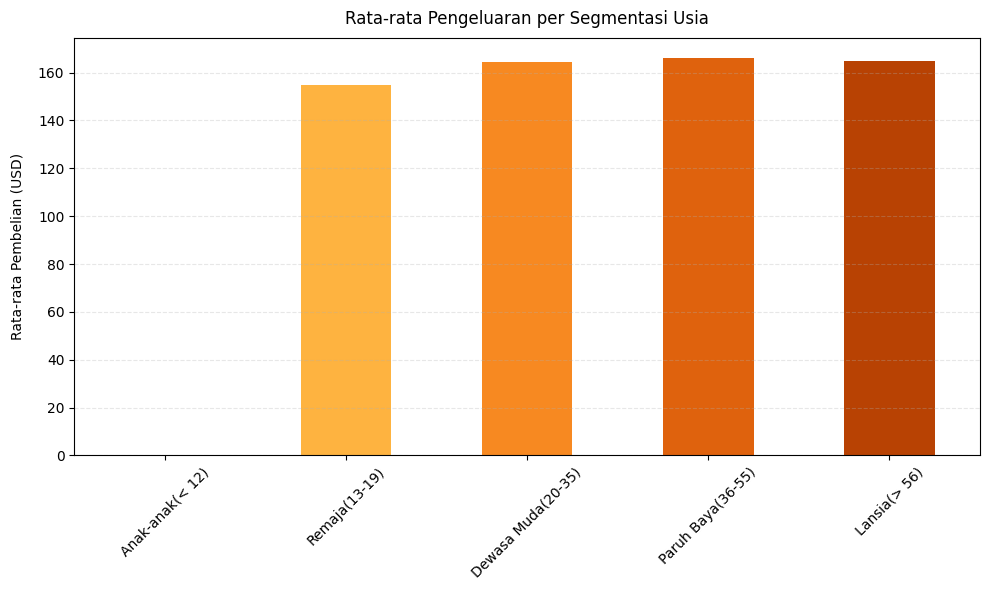

In [37]:
# Rata-rata pembelian berdasarkan kategori usia
age_spending = df_customer.groupby('AgeSegment', observed=False)['TotalPrice'].mean().sort_index()
colors = plt.cm.YlOrBr(np.linspace(0.3, 0.8, len(age_spending)))

age_spending.plot(kind='bar', figsize=(10, 6), color=colors)
plt.title('Rata-rata Pengeluaran per Segmentasi Usia',pad=10)
plt.ylabel('Rata-rata Pembelian (USD)',labelpad=10)
plt.xlabel('')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [38]:
age_spending.fillna(0).round().rename('Rata-Rata Pengeluaran(USD)')

,Rata-Rata Pengeluaran(USD)
AgeSegment,
Anak-anak(< 12),0.0
Remaja(13-19),155.0
Dewasa Muda(20-35),164.0
Paruh Baya(36-55),166.0
Lansia(> 56),165.0


- Paruh Baya (36–55) menjadi kelompok dengan daya beli tertinggi, diikuti sangat dekat oleh Dewasa Muda (20–35) dan Lansia (>56) — semuanya berada di kisaran 165 USD.
- Anak-anak (<12) nyaris tidak ada pengeluaran langsung, kemungkinan karena pembelian diwakili oleh orang tua.

##### **Metode Pembayaran Populer Berdasarkan Kategori Usia**

<Figure size 1200x800 with 0 Axes>

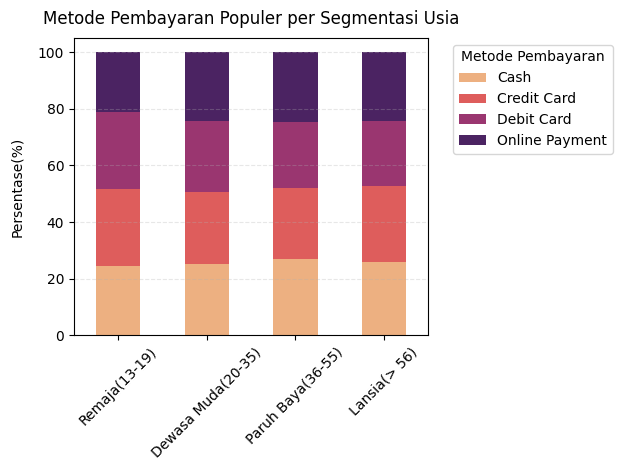

In [39]:
# Metode pembayaran populer berdasarkan kategori usia
plt.figure(figsize=(12, 8))
payment_segment = pd.crosstab(df_customer['AgeSegment'], df_customer['PaymentType'], normalize='index') * 100

payment_segment.plot(kind='bar', stacked=True, colormap='flare')
plt.title('Metode Pembayaran Populer per Segmentasi Usia', pad=10)
plt.ylabel('Persentase(%)',labelpad=10)
plt.xlabel('')
plt.xticks(rotation=45)
plt.legend(title='Metode Pembayaran', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

In [40]:
payment_segment.round(1).style.format('{:.1f}%')

PaymentType,Cash,Credit Card,Debit Card,Online Payment
AgeSegment,,,,
Remaja(13-19),24.6%,27.2%,27.2%,21.1%
Dewasa Muda(20-35),25.0%,25.7%,25.0%,24.2%
Paruh Baya(36-55),27.0%,25.1%,23.2%,24.7%
Lansia(> 56),26.0%,26.8%,22.7%,24.4%


- Pola metode pembayaran cenderung seragam di semua kelompok usia, tanpa perbedaan signifikan.
- Cash, Credit Card, dan Debit Card memiliki porsi hampir seimbang (masing-masing sekitar seperempat dari total pembayaran).
- Online Payment memang paling kecil porsinya, tapi tetap dipakai secara konsisten oleh semua segmen usia.

### **Kesimpulan**

Penjualan tahunan berada di kisaran USD 128.000 – 141.000, dengan puncak di tahun 2018 dan 2020. Sejak 2020, kanal online melampaui offline dan terus tumbuh signifikan, sementara offline menurun tajam akibat pandemi dan tidak kembali ke level awal. Penjualan setiap kategori produk relatif seimbang, dengan Toys tertinggi (USD 165.599).

Pelanggan didominasi segmen Paruh Baya (36–55) dan Dewasa Muda (20–35), yang juga menjadi penyumbang pembelian terbesar di hampir semua kategori. Lokasi strategis seperti City-18 memiliki kontribusi tinggi di banyak kategori, sedangkan City-17 tertinggal jauh. Pola pembayaran seragam di semua segmen usia, tanpa dominasi metode tertentu.

Solusi pengembangan ke depan:
- Perkuat strategi online sales dengan kampanye digital, bundling produk, dan promosi berbasis personalisasi.
- Jadikan offline store sebagai kanal pendukung pengalaman merek (experience center), bukan sekadar titik penjualan.
- Prioritaskan segmen Paruh Baya (36–55) dan Dewasa Muda (20–35) sebagai segmen inti, dengan program loyalitas dan rekomendasi produk yang relevan.
- Dorong partisipasi Lansia (>56) melalui edukasi & kemudahan belanja online (UI sederhana, customer service interaktif).
- Ciptakan kampanye untuk Remaja yang menggabungkan hiburan, gamifikasi, atau kolaborasi influencer untuk meningkatkan engagement.
- Tingkatkan penetrasi di wilayah strategis seperti City-18 (pasar multi-kategori utama) dan kembangkan potensi kota unggulan per kategori.
- Pertahankan keberagaman kategori produk karena kontribusinya relatif seimbang, sehingga semua kategori tetap perlu didukung.
- Pertahankan opsi pembayaran yang beragam, sambil mendorong adopsi online payment melalui insentif seperti cashback atau poin reward.
- Sesuaikan stok dan promosi berdasarkan musim, misalnya pakaian di musim hujan, dekorasi di musim salju/liburan, dan makanan di musim cerah.